In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [9]:
time_step = 1e-12 # simulate in these time steps
sim_time = 100e-9 # simulation time in seconds
source_impedance = 50 # ohms
tline_impedance = 50 # ohms
load_impedance = 50 # ohms

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
100000.0


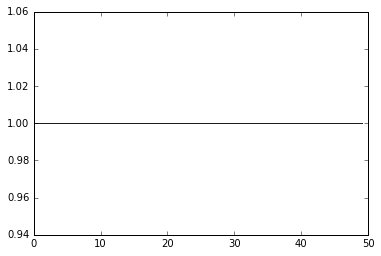

In [18]:
source_waveform = [1 for x in np.linspace(0, sim_time / time_step, endpoint=True)]
print source_waveform
print sim_time / time_step
plt.plot(source_waveform)

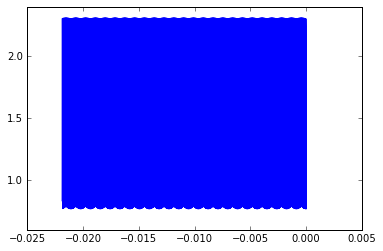

In [75]:
# HW2 Problem 5
length = .21875
freq = 1.2e9
beta = 2 * np.pi * freq
ZS = 5.0
ZL = 16.66 + 8.4e-8j
Z0 = 50.0
gamma_L = (ZL - Z0) / (ZL + Z0)
gamma_in = gamma_L * np.exp(-2j * beta * length)
z = np.linspace(-length, 0, 100000)

V0_plus = [np.exp(-1j * beta * l) * Z0 / (Z0 * (1 + gamma_in) + ZS * (1 - gamma_in)) for l in z]
extra = [(np.exp(-1j * beta * l) + gamma_L * np.exp(1j * beta * l)) for l in z]
V = np.multiply(V0_plus, extra)
plt.plot(np.linspace(-length, 0, 100000)[90000:], np.abs(V)[90000:])